##### Imports

In [ ]:
import asvFormula.experiments as exp
from asvFormula.bayesianNetworks.bayesianNetwork import childBNAsTree
from asvFormula.bayesianNetworks import networkSamplesPath
from asvFormula import asvRunResultsPath
from asvFormula.datasetManipulation import *
from pgmpy.readwrite import BIFReader
from pgmpy.inference import VariableElimination

from importlib import reload 
import asvFormula
import asvFormula.experiments as exp

#exp = reload(asvFormula.experiments)

decisionTreesFolder = 'results/decisionTrees/'
seed = 12

In [ ]:
BNmodel, variableToPredict, numberOfSamples, treeMaxDepth = exp.cancerNetworkConfig()

BNInference, valuesPerFeature, encodedDataset, dtTreeClassifier, dtAsNetwork = initializeDataAndRemoveVariable(BNmodel, variableToPredict, numberOfSamples, treeMaxDepth, seed)
dataNoPrediction = encodedDataset.drop(variableToPredict, axis=1)
first_instance = dataNoPrediction.iloc[0]


  0%|          | 0/5 [00:00<?, ?it/s]

The model accuracy is : 0.7166666666666667


In [ ]:
asvCalc = exp.ASV(BNmodel, dtTreeClassifier, BNInference, valuesPerFeature, variableToPredict, 'Exact', first_instance)

# Use the complete bayesian network to calculate the mean prediction
cancerNetworkPath = networkSamplesPath + '/cancer.bif'
completeBNModel = BIFReader(cancerNetworkPath).get_model()
num_variables = len(completeBNModel.nodes())

completeBNInference = VariableElimination(completeBNModel)

exp.showMeanPredictionOfModel(variableToPredict, completeBNInference, valuesPerFeature, dtTreeClassifier, asvCalc, num_variables)

Mean prediction of model for the variable Smoker
Mean prediction value for the decision tree: [0.98605 0.01395], it took 0.008487349999995786 seconds
Mean prediction value for possible values of the dataset: [0.9860499999999999, 0.013950000000000004], it took 0.053216999000142096 seconds


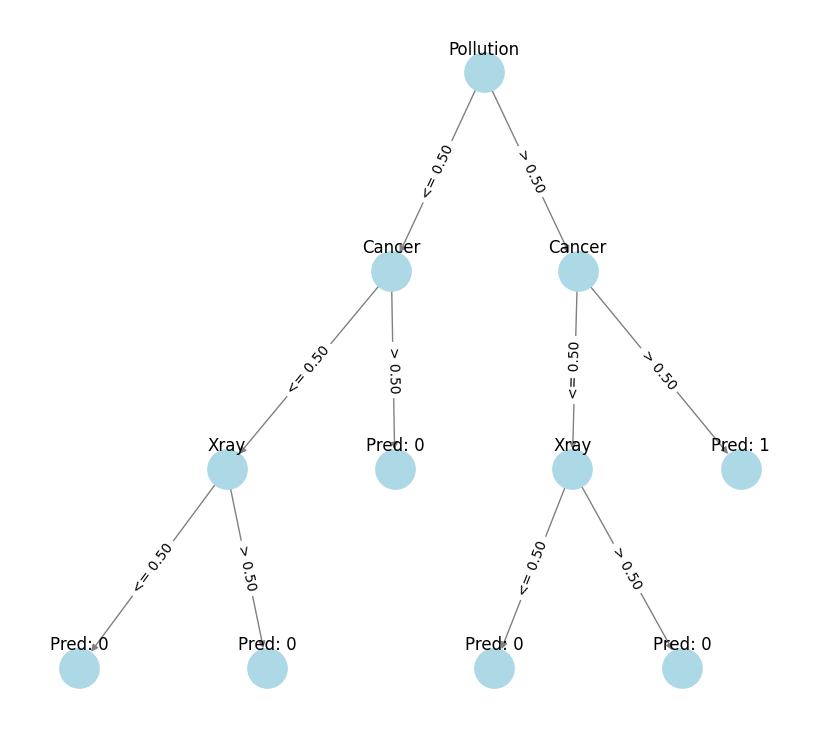

In [7]:
drawDecisionTree(dtAsNetwork)

### Running ASV for Cancer bayesian network

#### Train the decision tree model

In [ ]:
BNmodel, variableToPredict, numberOfSamples, treeMaxDepth = exp.cancerNetworkConfig()

BNInference, valuesPerFeature, encodedDataset, dtTreeClassifier, dtAsNetwork = initializeDataAndRemoveVariable(BNmodel, variableToPredict, numberOfSamples, treeMaxDepth, seed)

  0%|          | 0/5 [00:00<?, ?it/s]

The model accuracy is : 0.7166666666666667


#### Mean prediction of model

In [9]:
dataNoPrediction = encodedDataset.drop(variableToPredict, axis=1)
first_instance = dataNoPrediction.iloc[0]

asvCalc = exp.ASV(BNmodel, dtTreeClassifier, BNInference, valuesPerFeature, variableToPredict, 'Exact', first_instance)

# Use the complete bayesian network to calculate the mean prediction
cancerNetworkPath = networkSamplesPath + '/cancer.bif'
completeBNModel = BIFReader(cancerNetworkPath).get_model()
num_variables = len(completeBNModel.nodes())

completeBNInference = VariableElimination(completeBNModel)

exp.showMeanPredictionOfModel(variableToPredict, completeBNInference, valuesPerFeature, dtTreeClassifier, asvCalc, num_variables)

Mean prediction of model for the variable Smoker
Mean prediction value for the decision tree: [0.98605 0.01745], it took 0.0025038500000107433 seconds
Mean prediction value for the probabilities of the decision tree: [0.66181852 0.33818148], it took 0.0025038500000107433 seconds
Mean prediction value for possible values of the dataset: [0.9860500000000001, 0.013950000000000008], it took 0.014730999999983396 seconds
Estimated value for shap explainer: [0.66666667 0.33333333]
Probabilities of the variable in the bayesian network: [0.7, 0.3]


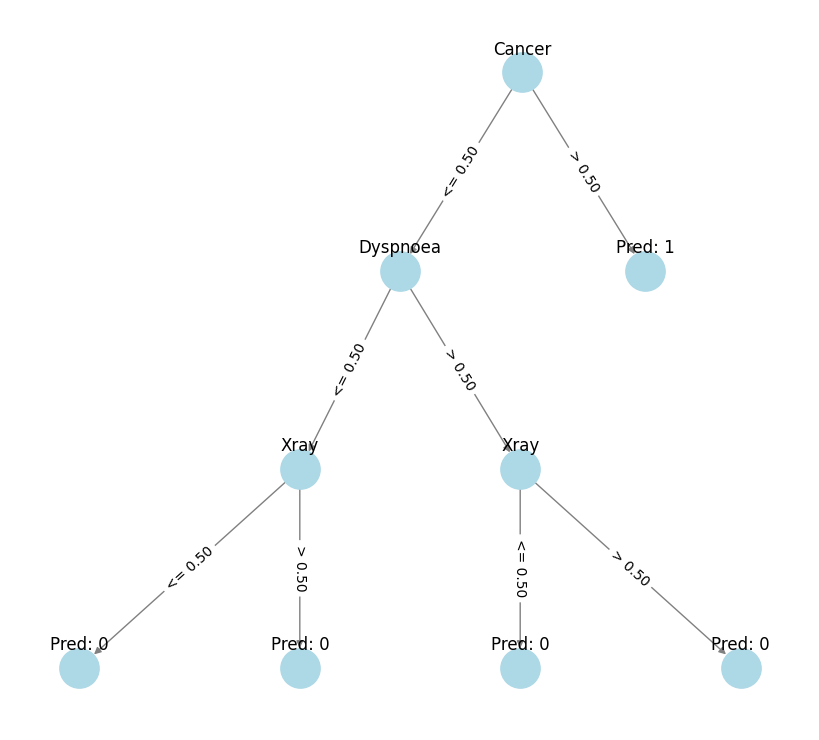

In [4]:
drawDecisionTree(dtAsNetwork, decisionTreesFolder + 'cancerDecisionTree.png')

### Running ASV for Child bayesian network

#### Train the decision tree model

In [3]:
BNmodel, variableToPredict, numberOfSamples, treeMaxDepth = exp.childNetworkConfig()

BNInference, valuesPerFeature, encodedDataset, dtTreeClassifier, dtAsNetwork = initializeDataAndRemoveVariable(BNmodel, variableToPredict, numberOfSamples, treeMaxDepth , seed)


  0%|          | 0/20 [00:00<?, ?it/s]

The model accuracy is : 0.668


#### Mean prediction of model

In [4]:
dataNoPrediction = encodedDataset.drop(variableToPredict, axis=1)
first_instance = dataNoPrediction.iloc[0]

asvCalc = exp.ASV(BNmodel, dtTreeClassifier, BNInference, valuesPerFeature, variableToPredict, 'Exact', first_instance)

# Use the complete bayesian network to calculate the mean prediction
childNetworkPath = networkSamplesPath + '/child.bif'
completeBNModel = BIFReader(childNetworkPath).get_model()
completeBNInference = VariableElimination(completeBNModel)
num_variables = len(completeBNModel.nodes())

exp.showMeanPredictionOfModel(variableToPredict, completeBNInference, valuesPerFeature, dtTreeClassifier, asvCalc, 5)
#drawDecisionTree(dtAsNetwork, decisionTreesFolder + 'childDecisionTree.png')

#The prediction for the first instance is 0, so if a lot of the features are fixed, then there is a higher chance that the prediction is 0.



Mean prediction of model for the variable Age
Mean prediction value for the decision tree: [0.71550979 0.2835226  0.00096761], it took 0.016918643999986216 seconds
Mean prediction value for possible values of the dataset: [0.715509787845522, 0.28352259882257375, 0.0009676133319044042], it took 0.5535634130000062 seconds


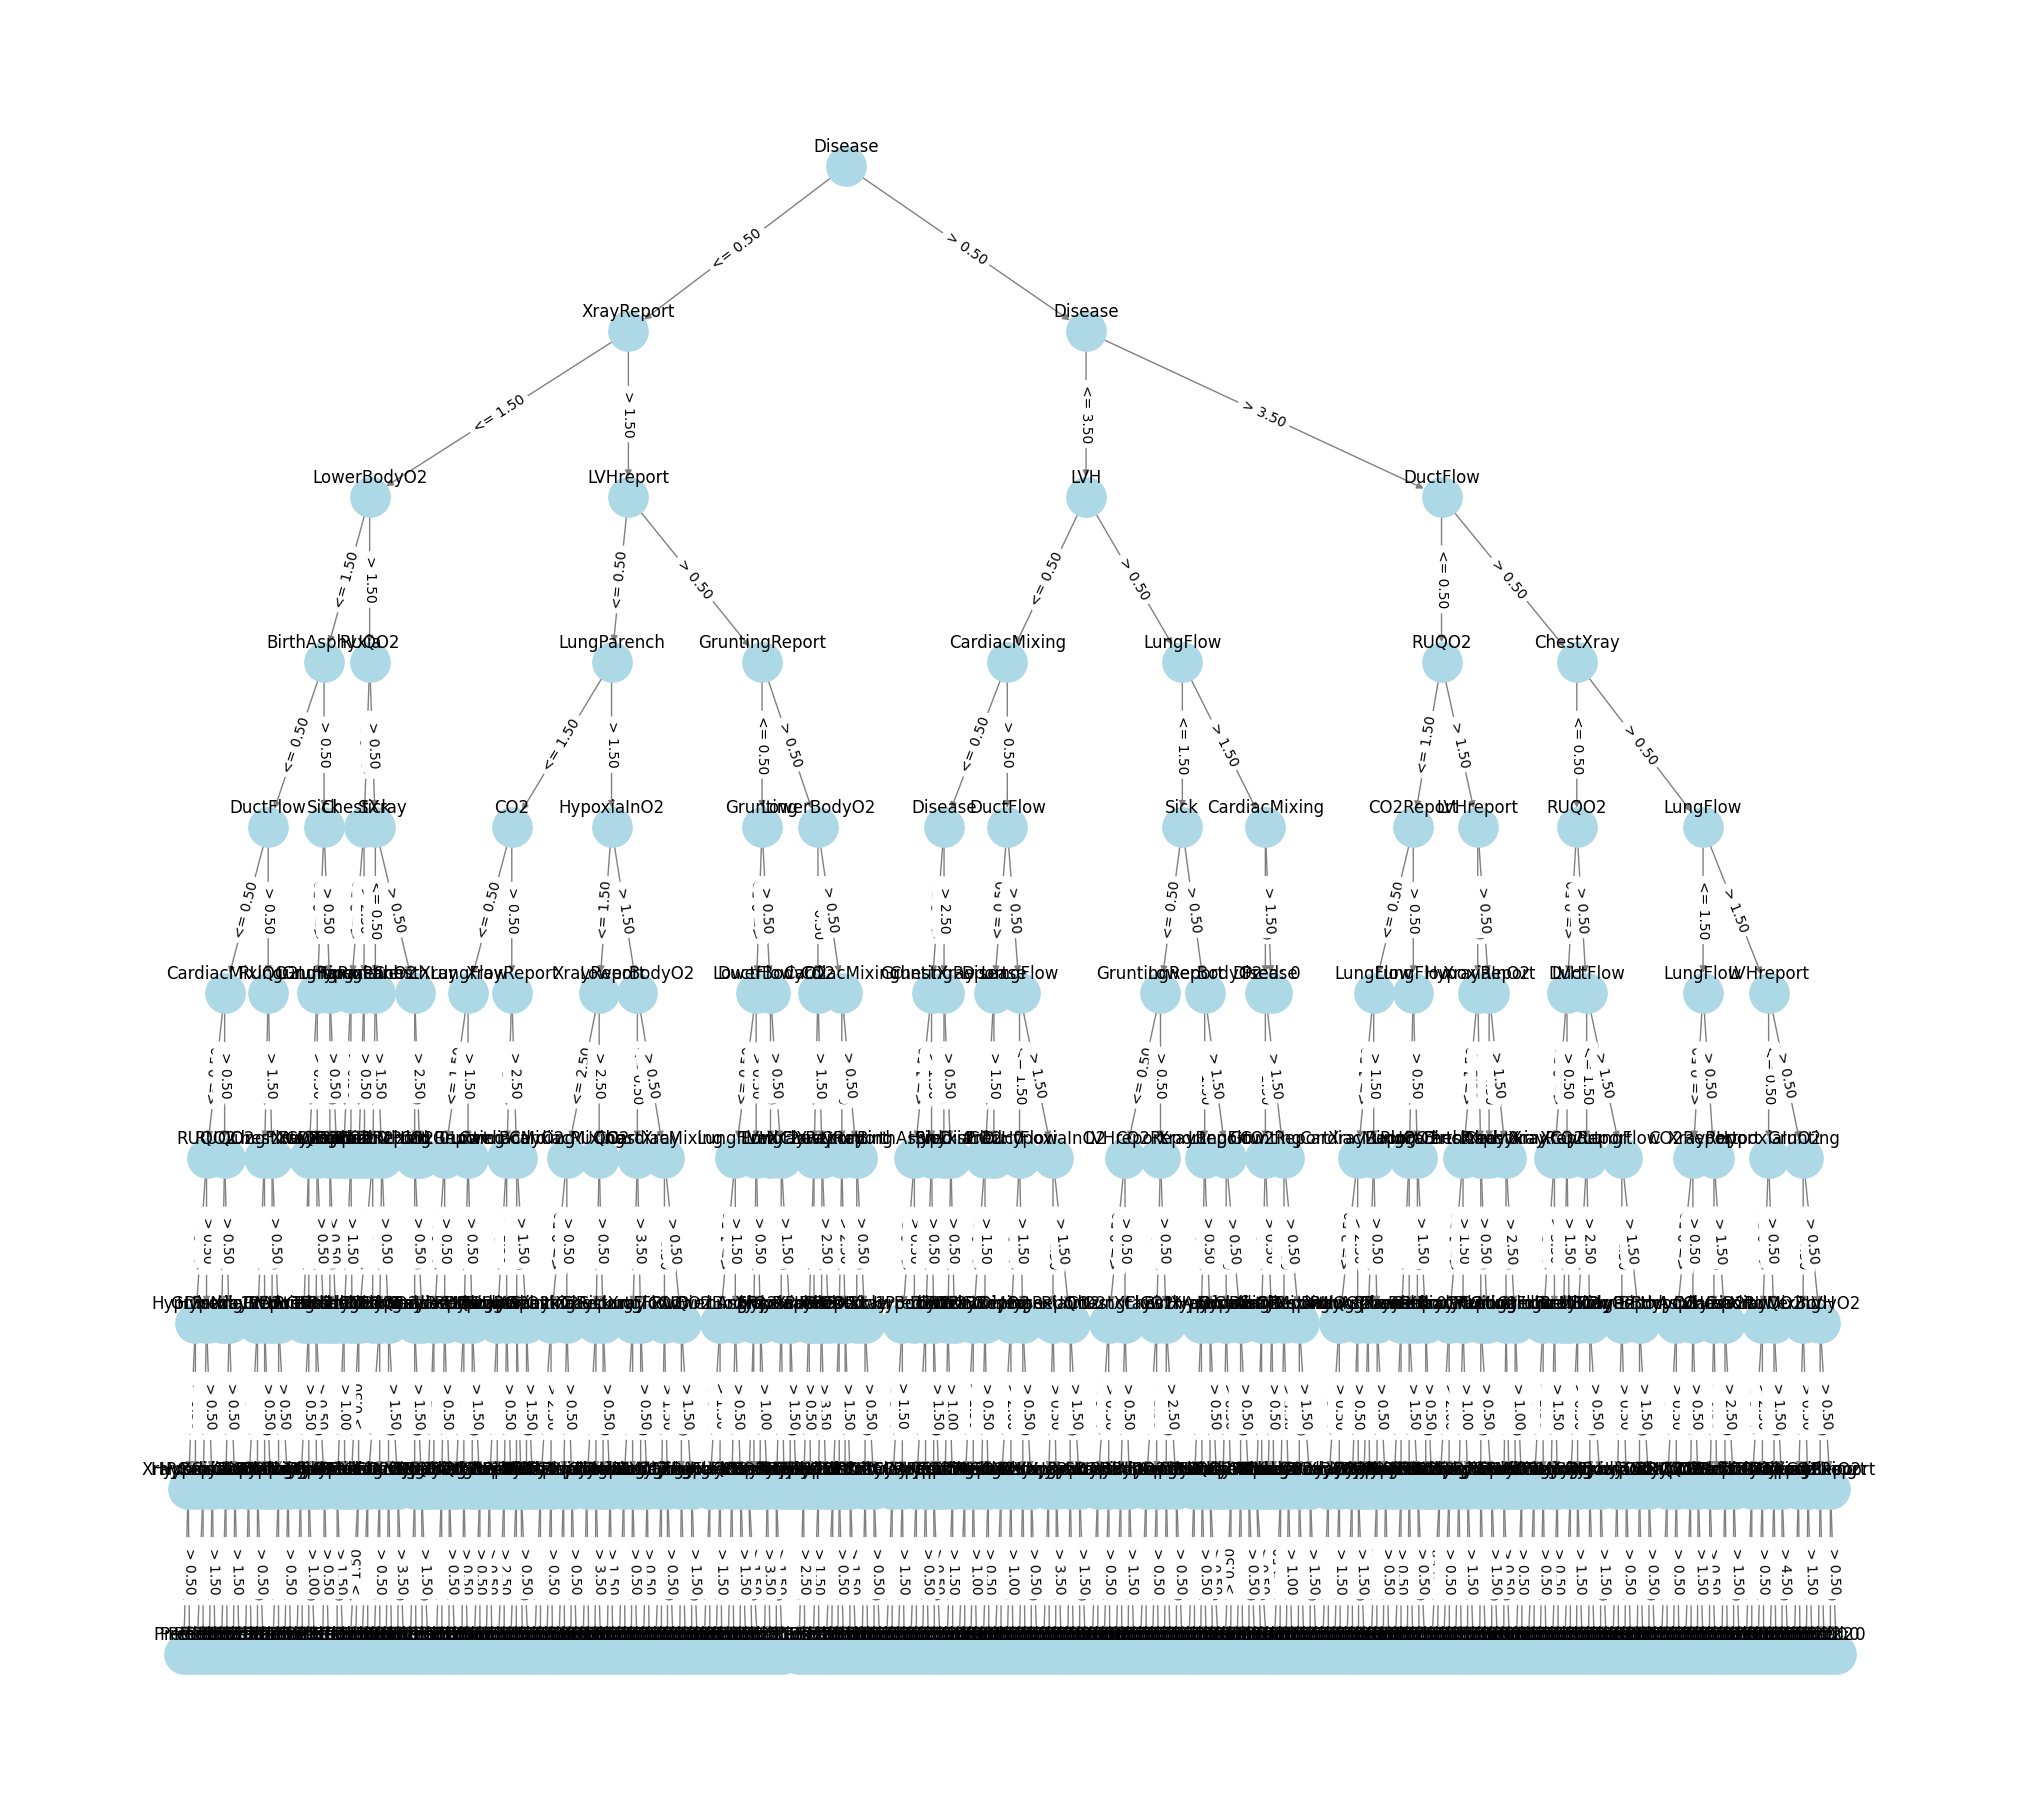

In [ ]:
drawDecisionTree(dtAsNetwork, decisionTreesFolder + 'childDecisionTree.png')